In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "vipinkatara01" # username from the json file
os.environ['KAGGLE_KEY'] = "9527f11bbe69274430c90ddbc7ee0e8d"
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 440M/450M [00:07<00:00, 53.6MB/s]
100% 450M/450M [00:07<00:00, 62.6MB/s]


In [ ]:
!unzip flowers-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b7355_n.jpg  
  inflating: flowers/flowers/rose/12323085443_8ac0

In [ ]:
os.listdir('flowers')

['rose', 'tulip', 'dandelion', 'sunflower', 'daisy', 'flowers']

In [ ]:
os.chdir('flowers')

In [ ]:
os.listdir()

['rose', 'tulip', 'dandelion', 'sunflower', 'daisy', 'flowers']

In [ ]:
!rm -rf flowers

In [ ]:
os.chdir('..')

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data

In [ ]:
DATA_DIR = 'flowers'
CATEGORIES = os.listdir(DATA_DIR)
HEIGHT = 100
WIDTH = 100
CHANNEL = 3
data = []

for category in CATEGORIES:
    path = os.path.join(DATA_DIR,category)
    cat = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),CHANNEL)
            new_array = cv2.resize(img_array, (HEIGHT,WIDTH))
            data.append([new_array,cat])
        except Exception as E:
            pass

In [ ]:
#checking shape
np.shape(data)

(4323, 2)

# separating feature and label

In [ ]:
X = []
Y = []
for feature, label in data:
    X.append(feature)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

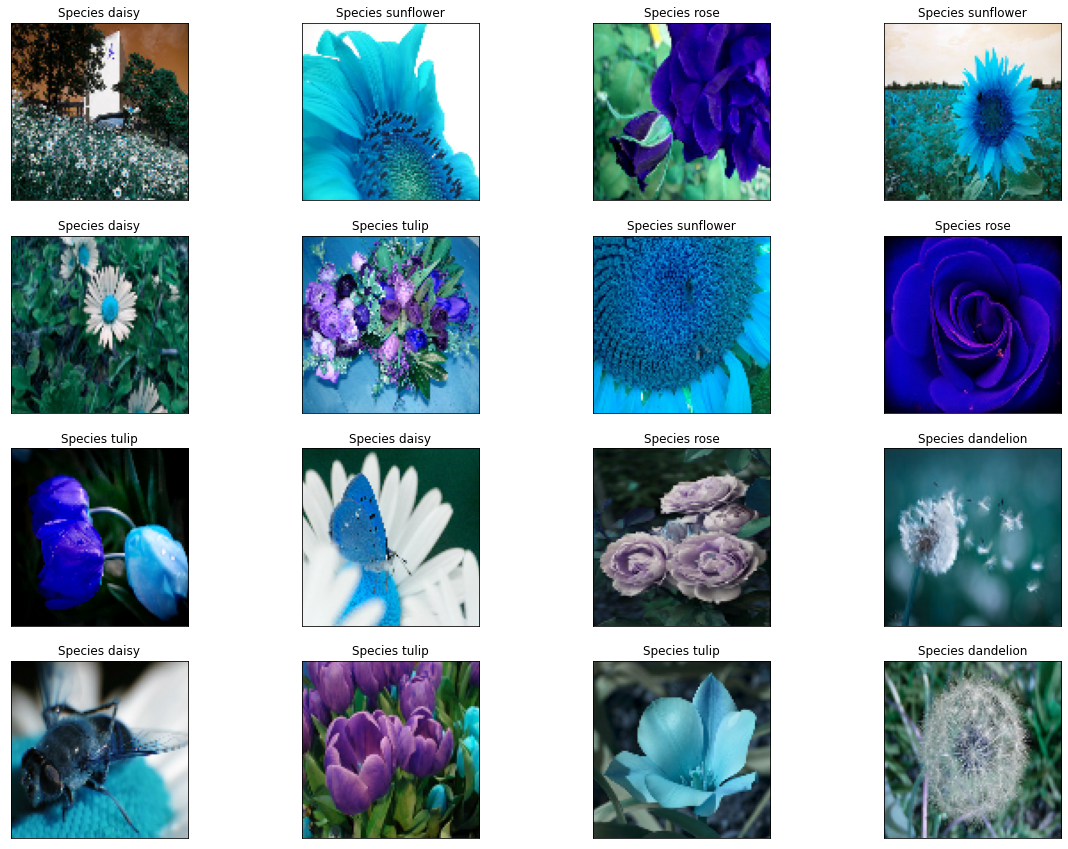

In [ ]:


val = np.random.randint(0, X.shape[0], 16)
r = 1
plt.figure(figsize=(20,15))
for value in val:
    
    plt.subplot(4,4,r)
    r += 1
    plt.title('Species '+CATEGORIES[Y[value]])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[value])
    
plt.show()



In [ ]:
from keras.utils import to_categorical
Y = to_categorical(Y)

Using TensorFlow backend.


# Spliting the data into test train and validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
np.shape(x_train)

(3458, 100, 100, 3)

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator




# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

# Model

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(Flatten())
model.add(Dense(625,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 625)               2880625   
_________________________________________________________________
dense_2 (Dense)              (None, 125)               78250     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                3150      
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_______________________________________________________

# Training the model

In [18]:
history = model.fit(x_train,y_train, batch_size=32, epochs = 200, validation_split=0.1)

Train on 3112 samples, validate on 346 samples
Epoch 1/200
3112/3112 [==============================] - 35s 11ms/step - loss: 2.6419 - accuracy: 0.2622 - val_loss: 1.3553 - val_accuracy: 0.3671
Epoch 2/200
3112/3112 [==============================] - 25s 8ms/step - loss: 1.2989 - accuracy: 0.4039 - val_loss: 1.2277 - val_accuracy: 0.4682
Epoch 3/200
3112/3112 [==============================] - 25s 8ms/step - loss: 1.2679 - accuracy: 0.4406 - val_loss: 1.2185 - val_accuracy: 0.4827
Epoch 4/200
3112/3112 [==============================] - 25s 8ms/step - loss: 1.2121 - accuracy: 0.4704 - val_loss: 1.2048 - val_accuracy: 0.4798
Epoch 5/200
3112/3112 [==============================] - 25s 8ms/step - loss: 1.1621 - accuracy: 0.4814 - val_loss: 1.1165 - val_accuracy: 0.5376
Epoch 6/200
3112/3112 [==============================] - 25s 8ms/step - loss: 1.1194 - accuracy: 0.5241 - val_loss: 1.0994 - val_accuracy: 0.5867
Epoch 7/200
3112/3112 [==============================] - 25s 8ms/step - loss

# Predicting the test data

In [19]:
pred = model.predict(x_test)

# Accuracy score

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred.round(),y_test))

0.7687861271676301


# training vs validation loss

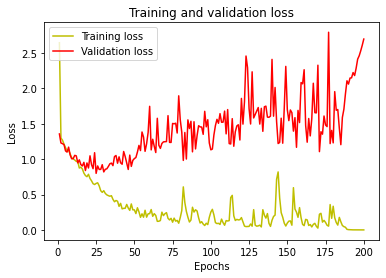

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# training vs validation accuracy

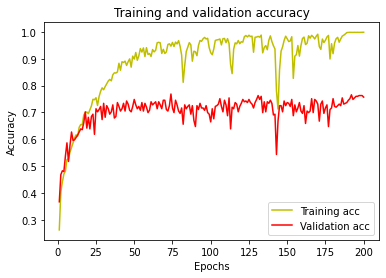

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()